<a href="https://colab.research.google.com/github/tavakohr/rprojects/blob/main/calibration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%load_ext rpy2.ipython
from google.colab import files

In [2]:
%%R
library(tidyverse)

R[write to console]: ── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

R[write to console]: ✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.3     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   2.0.1     ✔ forcats 0.5.1

R[write to console]: ── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [3]:
%%R
x1 = rnorm(10000)           # some continuous variables
z = 2 + x1       # linear combination with a bias
pr = 1/(1+exp(-z))         # pass through an inv-logit function
y = rbinom(10000,1,pr)      # bernoulli response variable

In [5]:
%%R
#now feed it to glm:
df1 = data.frame(y=y,x=x1)
model1<-glm( y~x,data=df1,family="binomial")
model1


Call:  glm(formula = y ~ x, family = "binomial", data = df1)

Coefficients:
(Intercept)            x  
     1.9776       0.9664  

Degrees of Freedom: 9999 Total (i.e. Null);  9998 Residual
Null Deviance:	    8680 
Residual Deviance: 7652 	AIC: 7656


In [6]:
%%R
x2 = rnorm(10000)           # some continuous variables
z2 = -2 + 2*x2       # linear combination with a bias
pr2 = 1/(1+exp(-z2))         # pass through an inv-logit function
y2 = rbinom(10000,1,pr2)      # bernoulli response variable
df2 = data.frame(y=y2,x=x2)



In [7]:
%%R
incidence_O<-sum(y)/length(y)
incidence_U<-sum(y2)/length(y2)



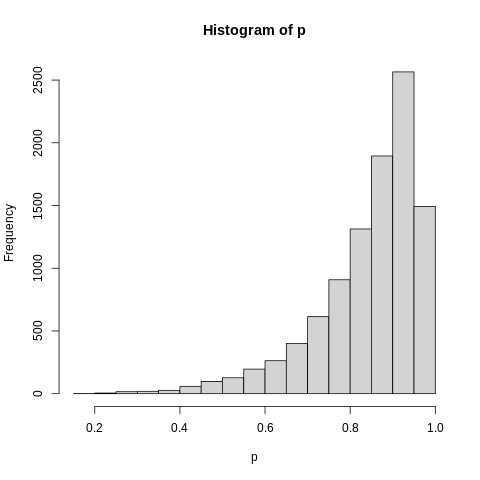

In [8]:
%%R
mean(predict(model1,newdata=df1,type='response'))
mean(predict(model1,newdata=df2,type='response'))
p=predict(model1,newdata=df2,type='response')
hist(p)


In [10]:
%%R
CF=(incidence_U/(1-incidence_U))/(incidence_O/(1-incidence_O))
CF

[1] 0.05282911


[1] 0.3053583


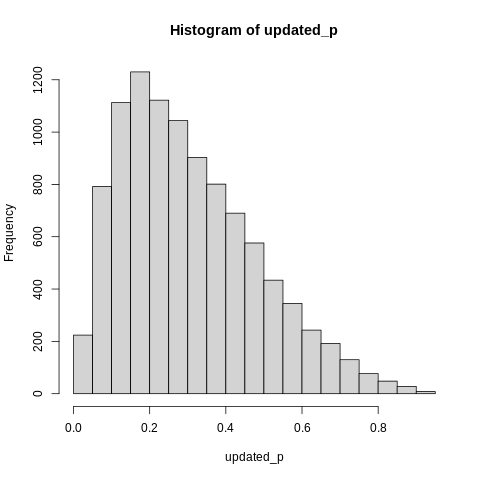

In [11]:
%%R
updated_p=(p*CF)/(1+p*CF-p)
hist(updated_p)
mean(updated_p)


[1] 0.2215


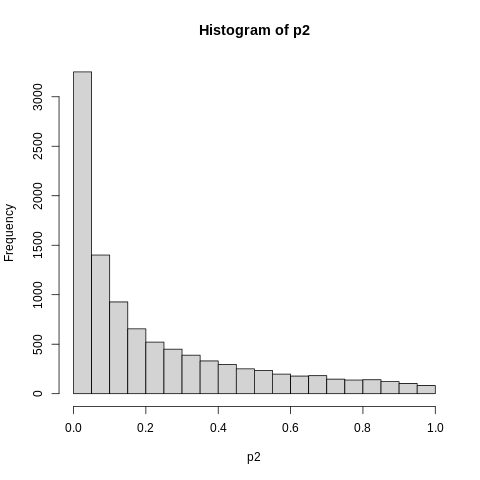

In [12]:
%%R
model2<-glm( y~x,data=df2,family="binomial")
model2
p2=predict(model2,newdata=df2,type='response')
hist(p2)
mean(p2)



In [15]:
%%R
print(sum((p-y2)^2)/length(y2))
print(sum((updated_p-y2)^2)/length(y2))
print(sum((p2-y2)^2)/length(y2))

[1] 0.5314678
[1] 0.1258918
[1] 0.1113009
